# Exercício 3

> 3) Selecione o melhor resultado encontrado até agora com relação a BoW (TF, TF+bigrama, TF-IDF e TF-IDF+bigrama). Escolha outros três algoritmos de classificação, refaça o experimento e compare os resultados. Preste atenção nas diferenças entre cada uma das classes para cada um dos algoritmos escolhidos.

In [17]:
import re

import nltk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.model_selection import cross_val_predict

In [18]:
dataset = pd.read_csv(r'/home/tulio/Documents/UFU/ORI/Tweets_Mg.csv')

In [19]:
dataset.describe()

,Unnamed: 0,Geo Coordinates.latitude,Geo Coordinates.longitude,Retweet Count,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
count,8199.000000,104.000000,104.000000,8199.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,4099.000000,-42.964716,-19.530204,43.338212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2366.991762,1.399314,1.037815,123.369519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,-46.643035,-23.493237,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2049.500000,-43.941907,-19.914265,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4099.000000,-41.971876,-18.879871,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6148.500000,-41.943662,-18.859150,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,8198.000000,-41.560230,-18.568089,1940.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
dataset.count()

Unnamed: 0                   8199
Created At                   8199
Text                         8199
Geo Coordinates.latitude      104
Geo Coordinates.longitude     104
User Location                5489
Username                     8199
User Screen Name             8199
Retweet Count                8199
Classificacao                8199
Observação                      1
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

In [21]:
dataset['Classificacao'].value_counts()

Positivo    3300
Neutro      2453
Negativo    2446
Name: Classificacao, dtype: int64

In [22]:
tweets, sentimentos = dataset['Text'], dataset['Classificacao']

In [23]:
vectorizer = CountVectorizer(analyzer='word', ngram_range=(1,2))
freq_tweets = vectorizer.fit_transform(tweets)

In [24]:
rf_model = RandomForestClassifier(random_state=2023)
dt_model = DecisionTreeClassifier(max_depth=3, random_state=2023)
knn_model = KNeighborsClassifier(n_neighbors=10)
svc_model = SVC()
model = MultinomialNB()

In [25]:
rf_model.fit(freq_tweets,sentimentos)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2023,
                       verbose=0, warm_start=False)

In [26]:
dt_model.fit(freq_tweets,sentimentos)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2023, splitter='best')

In [27]:
knn_model.fit(freq_tweets,sentimentos)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [28]:
svc_model.fit(freq_tweets,sentimentos)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
model.fit(freq_tweets,sentimentos)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [31]:
testes = ['O governo de Minas é uma tragédia, muito ruim','Estou muito feliz com o governo de Minas esse ano','O estado de Minas Gerais decretou calamidade financeira!!!','A segurança do estado está deixando a desejar','O governador de Minas é do Novo']
print(testes)

['O governo de Minas é uma tragédia, muito ruim', 'Estou muito feliz com o governo de Minas esse ano', 'O estado de Minas Gerais decretou calamidade financeira!!!', 'A segurança do estado está deixando a desejar', 'O governador de Minas é do Novo']


In [32]:
freq_testes = vectorizer.transform(testes)

In [33]:
rf_model.predict(freq_testes)

array(['Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro'], dtype=object)

In [34]:
dt_model.predict(freq_testes)

array(['Positivo', 'Positivo', 'Neutro', 'Neutro', 'Neutro'], dtype=object)

In [35]:
knn_model.predict(freq_testes)

array(['Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro'], dtype=object)

In [36]:
svc_model.predict(freq_testes)

array(['Neutro', 'Negativo', 'Neutro', 'Neutro', 'Negativo'], dtype=object)

In [37]:
model.predict(freq_testes)

array(['Negativo', 'Neutro', 'Negativo', 'Neutro', 'Neutro'], dtype='<U8')

## Validação Cruzada

### Random Forest

In [39]:
rf_resultados = cross_val_predict(rf_model,freq_tweets,sentimentos,cv=10)

In [40]:
metrics.accuracy_score(sentimentos,rf_resultados)

0.8837663129649957

In [42]:
print(metrics.classification_report(sentimentos, rf_resultados))

              precision    recall  f1-score   support

    Negativo       0.96      0.87      0.91      2446
      Neutro       0.74      0.94      0.83      2453
    Positivo       0.97      0.85      0.91      3300

    accuracy                           0.88      8199
   macro avg       0.89      0.89      0.88      8199
weighted avg       0.90      0.88      0.89      8199



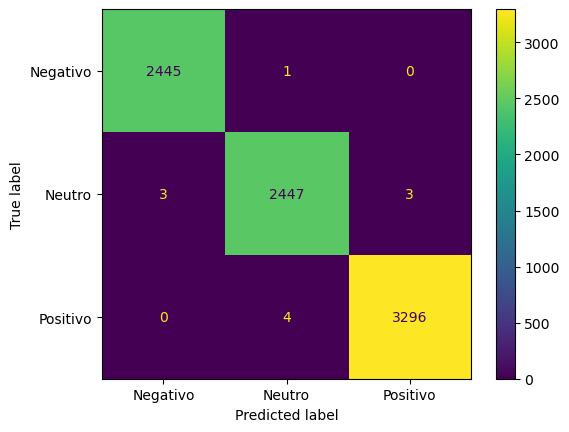

In [43]:
confusion_matrix = metrics.plot_confusion_matrix(rf_model,X=freq_tweets,y_true=sentimentos,values_format='.4g')

## DecisionTree

In [44]:
dt_resultados = cross_val_predict(dt_model,freq_tweets,sentimentos,cv=10)

In [45]:
metrics.accuracy_score(sentimentos,dt_resultados)

0.7528966947188681

In [46]:
print(metrics.classification_report(sentimentos, dt_resultados))

              precision    recall  f1-score   support

    Negativo       0.98      0.56      0.71      2446
      Neutro       0.74      0.70      0.72      2453
    Positivo       0.69      0.93      0.79      3300

    accuracy                           0.75      8199
   macro avg       0.80      0.73      0.74      8199
weighted avg       0.79      0.75      0.75      8199



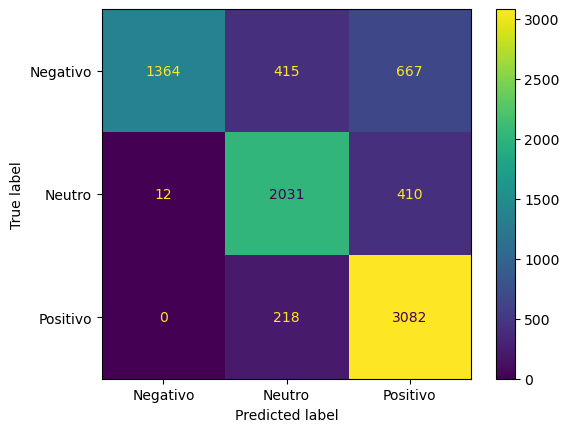

In [47]:
confusion_matrix = metrics.plot_confusion_matrix(dt_model,X=freq_tweets,y_true=sentimentos,values_format='.4g')

### K-Nearest Neighbors

In [48]:
knn_resultados = cross_val_predict(knn_model,freq_tweets,sentimentos,cv=10)

In [49]:
metrics.accuracy_score(sentimentos,knn_resultados)

0.67239907305769

In [50]:
print(metrics.classification_report(sentimentos, knn_resultados))

              precision    recall  f1-score   support

    Negativo       0.98      0.70      0.82      2446
      Neutro       0.48      0.99      0.64      2453
    Positivo       1.00      0.42      0.59      3300

    accuracy                           0.67      8199
   macro avg       0.82      0.70      0.68      8199
weighted avg       0.84      0.67      0.67      8199



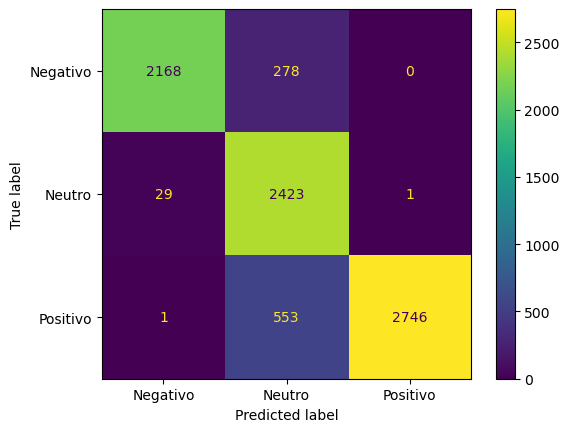

In [51]:
confusion_matrix = metrics.plot_confusion_matrix(knn_model,X=freq_tweets,y_true=sentimentos,values_format='.4g')

### SVC

In [52]:
svc_resultados = cross_val_predict(svc_model,freq_tweets,sentimentos,cv=10)

In [53]:
metrics.accuracy_score(sentimentos,svc_resultados)

0.8949871935601903

In [54]:
print(metrics.classification_report(sentimentos, svc_resultados))

              precision    recall  f1-score   support

    Negativo       0.95      0.90      0.92      2446
      Neutro       0.78      0.92      0.84      2453
    Positivo       0.97      0.88      0.92      3300

    accuracy                           0.89      8199
   macro avg       0.90      0.90      0.89      8199
weighted avg       0.91      0.89      0.90      8199



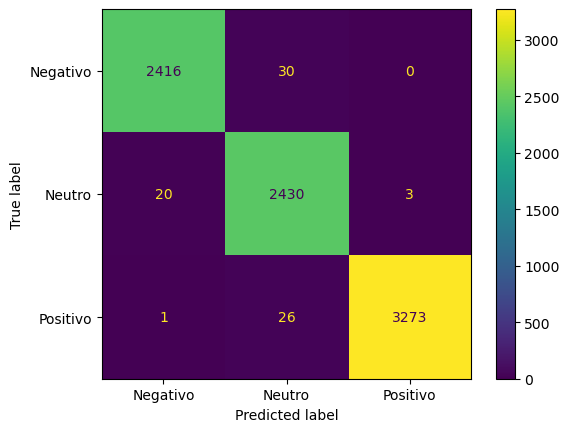

In [55]:
confusion_matrix = metrics.plot_confusion_matrix(svc_model,X=freq_tweets,y_true=sentimentos,values_format='.4g')

### MultinomialNB

In [56]:
resultados = cross_val_predict(model,freq_tweets,sentimentos,cv=10)

In [57]:
metrics.accuracy_score(sentimentos, resultados)

0.8954750579338944

In [58]:
print(metrics.classification_report(sentimentos, resultados))

              precision    recall  f1-score   support

    Negativo       0.91      0.93      0.92      2446
      Neutro       0.80      0.89      0.84      2453
    Positivo       0.97      0.88      0.92      3300

    accuracy                           0.90      8199
   macro avg       0.89      0.90      0.89      8199
weighted avg       0.90      0.90      0.90      8199



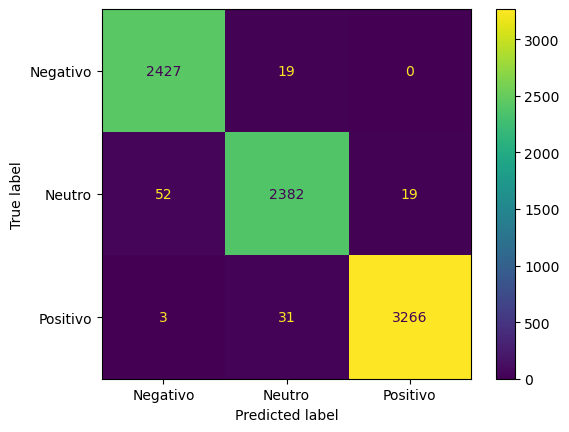

In [59]:
confusion_matrix = metrics.plot_confusion_matrix(model,X=freq_tweets,y_true=sentimentos,values_format='.4g')